<div style="text-align: left; background-color:black; font-family: Trebuchet MS; color:#FF0000; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: black solid;"> Netflix TV Shows and Movies </div>

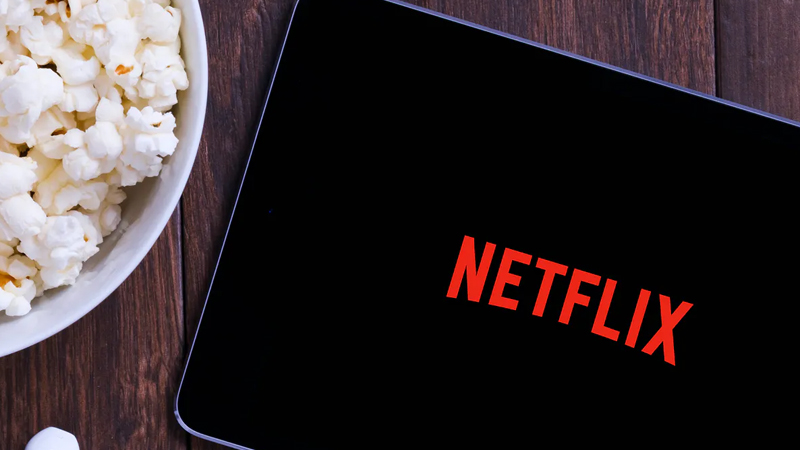

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

## <div style="background-color:#FF0000;font-family:Times New Roman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:9px 9px; padding: 15px; border-style: solid; border-color: black">TABLE OF CONTENTS</div>   
    
* [1. INTRODUCTION](#1)
    
* [2. IMPORTING LIBRARIES](#2)
    
* [3. LOADING AND EXPLAINING DATASET](#3)
    * [3.1 Reading Dataset](#3.1)
    * [3.2 Explain Dataset](#3.2)
    
* [4. EXPLORATORY SOME INFORMATION ABOUT DATASET](#4)
    
    * [4.1. Basic Information About Dataset](#4.1)    
    * [4.2. Descriptive Statistics of Dataset](#4.2)    
    * [4.4. Other Basic Information about Dataset](#4.3)
    * [4.5. Correlation between Variables of Dataset](#4.4)
    
* [5. PREPROCESSING DATASET](#5)

* [6. DATA VISUALIZATION](#6)
    
    * [6.1. Univarite Analysis](#6.1)
    * [6.2. Convertig the age certification to a more readable format:](#6.2)
    * [6.3. Analysing top 10 Netflix contributors - Content wise:](#6.3)
    * [6.4. Distribution of film production by countries](#6.4)
    * [6.5. Netflix´s shows and movies release date (1940-2021)](#6.5)
    * [6.6. Genres and IMDB Score](#6.6)
    * [6.7. Genres and TMDB Score](#6.7)
    * [6.8. Distribution of Release Year and IMDB Popularity by Type](#6.8)
    * [6.9. Distribution of Release Year and TMDB Popularity by Type](#6.9)


<a id="1"></a>
## <b>1 <span style='color:#B21010'>||</span> INTRODUCTION</b>

## let this be there, change color or something


<div style="border-radius:10px;
            border: black solid;
            adding: 15px;
            background-color:#FFF5EE;
            font-size:120%;
            text-aling: left">
<h3 style:'border:0; border-radius: 15px; color: black'><center> Some information about Netflix:</center></h3>

<b><mark>REFERENCE: 🔗</mark></b>
https://en.wikipedia.org/wiki/Netflix

_________________________________________________________________________
    
 Netflix, Inc. is an American subscription streaming service and production company based in Los Gatos, California. Founded on August 29, 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California, it offers a film and television series library through distribution deals as well as its own productions, known as Netflix Originals.
_________________________________________________________________________
    
As of June 30, 2022, Netflix had 220.7 million subscribers worldwide, including 73.3 million in the United States and Canada, 73.0 million in Europe, the Middle East and Africa, 39.6 million in Latin America and 34.8 million in the Asia-Pacific region. It is available worldwide aside from Mainland China, Syria, North Korea, and Russia. Netflix has played a prominent role in independent film distribution, and it is a member of the Motion Picture Association (MPA).   

<a id="2"></a>
## <b>2 <span style='color:#B21010'>||</span> IMPORTING LIBRARIES</b>

In [49]:
!pip install country_converter

# data
import pandas as pd
import numpy as np
import country_converter as coco

# visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
from wordcloud import WordCloud
colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']
from plotly.offline import init_notebook_mode, iplot

# nltk
import nltk

import ast
import random

<a id="3"></a>
## <b>3 <span style='color:#B21010'>||</span> LOADING AND EXPLAINING DATASET</b>

<a id="3.1"></a>
### <b>3.1 <span style='color:#B21010'>|</span> Loading Dataset

In [50]:
data_prime = pd.read_csv("../input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv", encoding="ISO-8859-1")
data_prime.shape

(9668, 12)

In [51]:
def read_dataset():
    credits=pd.read_csv('../input/netflix-tv-shows-and-movies/credits.csv')
    print('"credits.csv" imported successfully!')
    titles=pd.read_csv('../input/netflix-tv-shows-and-movies/titles.csv')
    print('"titles.csv" imported successfully!')
    return credits, titles

In [52]:
credits, titles=read_dataset()
titles.shape

"credits.csv" imported successfully!
"titles.csv" imported successfully!


(5850, 15)

In [53]:
#ser1 = titles.loc[:,'title']
#ser2 = data_prime.loc[:,'title']
#len(set(ser1) & set(ser2))


<a id="3.2"></a>
### <b>3.2 <span style='color:#B21010'>|</span> Explaining Dataset  keep this,change format

<div style="border-radius:10px;
            border :#000000 solid;
            padding: 15px;
            background-color:#FFF5EE;
            font-size:110%;
            text-align: left">
                
This data set was created to list all shows available on Netflix streaming, and analyze the data to find interesting facts. This data was acquired in July 2022 containing data available in the United States.
    
This dataset has two files containing the titles (titles.csv) and the cast (credits.csv) for the title.

📌 This dataset contains +5k unique titles on Netflix with 15 columns containing their information, including:

**id**: The title ID on JustWatch.
    
**title**: The name of the title.
    
**show_type**: TV show or movie.
    
**description**: A brief description.
    
**release_year**: The release year.
    
**age_certification**: The age certification.
    
**runtime**: The length of the episode (SHOW) or movie.
    
**genres**: A list of genres.
    
**production_countries**: A list of countries that produced the title.
    
**seasons**: Number of seasons if it's a SHOW.
    
**imdb_id**: The title ID on IMDB.
    
**imdb_score**: Score on IMDB.
    
**imdb_votes**: Votes on IMDB.
    
**tmdb_popularity**: Popularity on TMDB.
    
**tmdb_score**: Score on TMDB.
    
📌 And over +77k credits of actors and directors on Netflix titles with 5 columns containing their information, including:

**person_ID**: The person ID on JustWatch.
    
**id:** The title ID on JustWatch.
    
**name**: The actor or director's name.
    
**character_name**: The character name.
    
**role**: ACTOR or DIRECTOR.

<a id="4"></a>
## <b>4 <span style='color:#B21010'>|| </span>EXPLORATORY SOME INFORMATION ABOUT DATASET</b>

<a id="4.1"></a>
## <b>4.1 <span style='color:#B21010'>|</span> Descriptive Statistics of Dataset

In [54]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [55]:
#data_prime.info()
data_prime.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

### Note: We are using the amazon prime data set to look for the number of common shows and movies present in both the data sets. Since title has no missing values, we do not have to do any further data cleaning.

In [56]:
titles.describe().T.style.set_properties(**{"background-color": "#FFF5EE", "font-size" : "17px",
                                        "color": "#000000", "border-radius" : "1px", "border": "1.5px solid black"})

,count,mean,std,min,25%,50%,75%,max
release_year,5850.000000,2016.417094,6.937726,1945.000000,2016.000000,2018.000000,2020.000000,2022.000000
runtime,5850.000000,76.888889,39.002509,0.000000,44.000000,83.000000,104.000000,240.000000
seasons,2106.000000,2.162868,2.689041,1.000000,1.000000,1.000000,2.000000,42.000000
imdb_score,5368.000000,6.510861,1.163826,1.500000,5.800000,6.600000,7.300000,9.600000
imdb_votes,5352.000000,23439.382474,95820.470909,5.000000,516.750000,2233.500000,9494.000000,2294231.000000
tmdb_popularity,5759.000000,22.637925,81.680263,0.009442,2.728500,6.821000,16.590000,2274.044000
tmdb_score,5539.000000,6.829175,1.170391,0.500000,6.100000,6.900000,7.537500,10.000000


### Conclusion: The maximum IMDB score is 9.6 and minimum IMDB score is 1.14 on a scale of 1 to 10

<a id="4.2"></a>
## <b>4.2 <span style='color:#B21010'>|</span> Other Useful Information About Dataset

### Conclusion: Since we are not using the credits dataset, it is not relevant to our analysis.

## Titles:

In [57]:
print("Shape of the dataset: ", titles.shape)
print("_______________________________________")
print("Number of null values: ")
print(titles.isnull().sum())
print("_______________________________________")
print("Number of unique values: ")
print(titles.nunique())

Shape of the dataset:  (5850, 15)
_______________________________________
Number of null values: 
id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64
_______________________________________
Number of unique values: 
id                      5850
title                   5798
type                       2
description             5829
release_year              63
age_certification         11
runtime                  202
genres                  1726
production_countries     452
seasons                   26
imdb_id                 5447
imdb_score                80
imdb_votes              3880
tmdb_popula

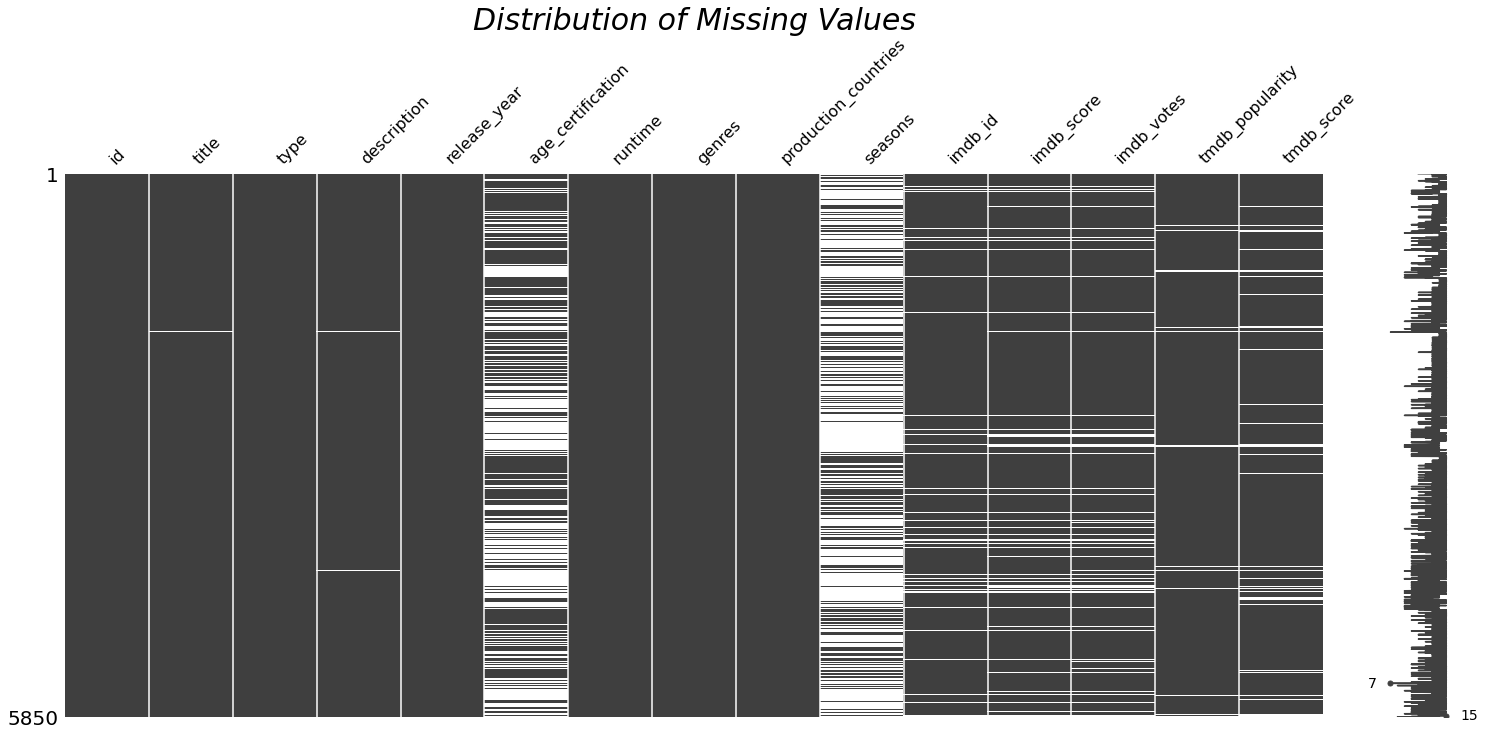

In [58]:
msno.matrix(titles)
plt.title('Distribution of Missing Values', fontsize=30, fontstyle='oblique');

### Since we do not need imdb_id for our analysis, we will drop that column.

### From another dataset, we will merge with another dataset which has only 4 missing values.

In [59]:
# Import the new data set:
data1 = pd.read_csv("../input/netflix-shows/netflix_titles.csv")
#Copy the existing titles into data2
data2 = titles.copy()

#Renaming and extracting the columns from data1:
df1 = pd.DataFrame().assign(title=data1['title'], age_certification=data1['rating'])
df2 = pd.DataFrame().assign(title=data2['title'], age_certification=data2['age_certification'])

#Merging the two columns
df3 = pd.merge(df1, df2)
df3.isnull().sum()


title                0
age_certification    0
dtype: int64

### Hence we have succeffully ensured that there are no null values for age certification by merging the columns.

In [60]:
titles.drop(['imdb_id'],axis=1)
titles.fillna(value=titles['imdb_score'].mean(), inplace=True)
titles.fillna(value=titles['imdb_votes'].mean(), inplace=True)
titles.fillna(value=titles['tmdb_popularity'].mean(), inplace=True)
titles.fillna(value=titles['tmdb_score'].mean(), inplace=True)


### We are using the mean value as the replacement because the data distribution is symmetric.

<a id="4.3"></a>
## <b>4.3 <span style='color:#B21010'>|</span> Verifying if the data set is clean:

In [61]:
titles.isnull().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

### Hence the data is now clean and we can proceed with further processing.

<a id="4.4"></a>
## <b>4.4 <span style='color:#B21010'>|</span> Analysing the common series/movies present in both amazon prime and netflix.

In [62]:
ser1 = titles.loc[:,'title']
ser2 = data_prime.loc[:,'title']
len(set(ser1) & set(ser2))


185

### Conclusion: Amazon and Netflix have only 185 common shows. 

<a id="4.5"></a>
## <b>4.5 <span style='color:#B21010'>|</span> Correlation Between Attributes

In [63]:
corr=titles.corr()
corr.style.background_gradient(cmap='Reds')

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,-0.173551,-0.226587,-0.125147,-0.205647,0.042978,0.031180
runtime,-0.173551,1.000000,0.553704,-0.140777,0.142886,0.003003,-0.265960
seasons,-0.226587,0.553704,1.000000,-0.189364,0.093332,0.036295,-0.300166
imdb_score,-0.125147,-0.140777,-0.189364,1.000000,0.189910,0.017321,0.522130
imdb_votes,-0.205647,0.142886,0.093332,0.189910,1.000000,0.209471,0.108081
tmdb_popularity,0.042978,0.003003,0.036295,0.017321,0.209471,1.000000,0.075046
tmdb_score,0.031180,-0.265960,-0.300166,0.522130,0.108081,0.075046,1.000000


### Conclusion: TMDB and IMDB scores are positively correlated. Season and runtime are positively correlated.


<a id="5"></a>
## <b>5 <span style='color:#B21010'>||</span> PREPROCESSING DATASET</b>

### Unpack and repair the production_countries and genre column values which are currently arrays

In [64]:
def repair_array_bound_categories(arr):
    arr=ast.literal_eval(arr)
    
    if len(arr)==0:
        return np.nan
    
    elif len(arr)==1:
        return arr[0]
    
    else:
        return random.choice(arr)

# find out what to write here.

In [65]:
titles["production_countries"]=titles["production_countries"].apply(repair_array_bound_categories)

titles["genres"]=titles["genres"].apply(repair_array_bound_categories)

<a id="6"></a>
## <b>6 <span style='color:#B21010'>||</span> DATA VISUALIZATION</b>


<a id="6.1"></a>
## <b>6.1 <span style='color:#B21010'>|</span> Univariate Analysis

### We are preforming a series of univariate analysis on the different pairs of attributes to understand the kind of content Netflix is putting out on its platform.

## Selecting types and genre

In [66]:
cat_cols=["type","genres"]

## After analysis of age_certification, generes and ratio of movies to tv shows

In [67]:
cat_cols

['type', 'genres']

In [68]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)

In [69]:
for col in cat_cols:
    cat_summary_with_graph(titles,col)

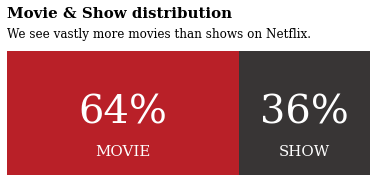

In [70]:
x=titles.groupby(['type'])['type'].count()
y=len(titles)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['MOVIE'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['SHOW'], left=mf_ratio['MOVIE'], 
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['MOVIE'][i]*100)}%", 
                   xy=(mf_ratio['MOVIE'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("MOVIE", 
                   xy=(mf_ratio['MOVIE'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['SHOW'][i]*100)}%", 
                   xy=(mf_ratio['MOVIE'][i]+mf_ratio['SHOW'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("SHOW", 
                   xy=(mf_ratio['MOVIE'][i]+mf_ratio['SHOW'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

# Title & Subtitle
fig.text(0.125,1.03,'Movie & Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than shows on Netflix.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

## Conclusion:

### As mentioned in the previous section, from the above movie v/s tv show plots, we can confidently say that our hypothesis was correct. This is because, 36% of the total data was tv shows, and mathematically this would be 2106 rows out of 5850 rows( We had null values in 3744 rows under seasons).

### It is clear that Netflix has significantly more movies than TV Shows. Upon examination of the history of netflix, it can be concluded that the reason for this parity may be due to the fact that the conception of the idea of Netflix was mainly for the purpose of renting movies. Moreover,the concept of "binge-watching" is a fairly recent phenomenon.

### Upon performing analysis on the generes, it is evident that the dramas and comedy have more demand in comparison others because, these generes have the maximum content.

<a id="6.2"></a>
## <b>6.2 <span style='color:#B21010'>|</span> Convertig the age certification to a more readable format:

In [71]:
#EXTRA
ratings_ages = {  'TV-Y' : 'Kids',
            'TV-Y7' : 'Kids' ,
            'TV-G'  : 'Kids',
            'PG'    : 'Kids',
            'TV-PG' : 'Kids',
            'PG-13' : 'Teens',
            'TV-14' : 'Teens',
            'R'     : 'Adults',
            'TV-MA' : 'Adults',
            'NC-17' : 'Adults',
            'NR': 'Adults',
            'UR': 'Adults',
            'TV-Y7-FV':'Kids',
            'G': 'Kids'} 

In [72]:
# Create a data frame having the age_ratings
df1 = titles.copy()

In [73]:
df3['ratings_group'] = df3['age_certification'].replace(ratings_ages)
df3['ratings_group'].unique()



array(['Teens', 'Adults', 'Kids'], dtype=object)

In [74]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(5850, 15)
(5850, 2)
(1537, 3)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'ratings_group')

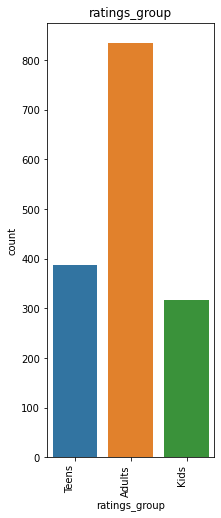

In [75]:
sns.countplot(df3['ratings_group'])
sns.countplot(df3['ratings_group']).set_xticklabels(sns.countplot(df3['ratings_group']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(3,8)
plt.title('ratings_group')

## Conclusion:
### Netflix's target audience is adults and young-adults, rather than children and hence they produce content to retain these audience on their platform this is the analysis of the content based on maturity ratings.It does not have a lot of choices for children.

<a id="6.3"></a>
## <b>6.3 <span style='color:#B21010'>|</span> Analysing top 10 Netflix contributors - Content wise:

In [76]:
country_count = titles['production_countries'].value_counts().head(10)
fig = px.bar(y=country_count.values, 
             x=country_count.index, 
             color = country_count.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=country_count.values,
             title= 'Top 10 countries that often contribute to Netflix',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Count",
    font = dict(size=20,family="Franklin Gothic"))
fig.show()

## Most of the content is produced in the US, but although India is at the second position it is lagging very much behind US.

<a id="6.4"></a>
## <b>6.4 <span style='color:#B21010'>|</span> Distribution of film production by countries

In [77]:
converted_country=coco.convert(names=titles["production_countries"], to="ISO3")
titles["production_countries"]=converted_country


In [78]:
country=titles["production_countries"].value_counts()
fig=px.choropleth(locations=country.index,
                  color=country.values,
                  color_continuous_scale=px.colors.sequential.dense,
                  template='plotly_dark',
                  title='Distribution of film production by countries')

fig.update_layout(font=dict(size=17, family="Franklin Gothic"))
fig.show()

### Conclusion: we can clearly observe here that 

<a id="6.5"></a>
## <b>6.5 <span style='color:#B21010'>|</span> Netflix´s shows and movies release date (1940-2021)

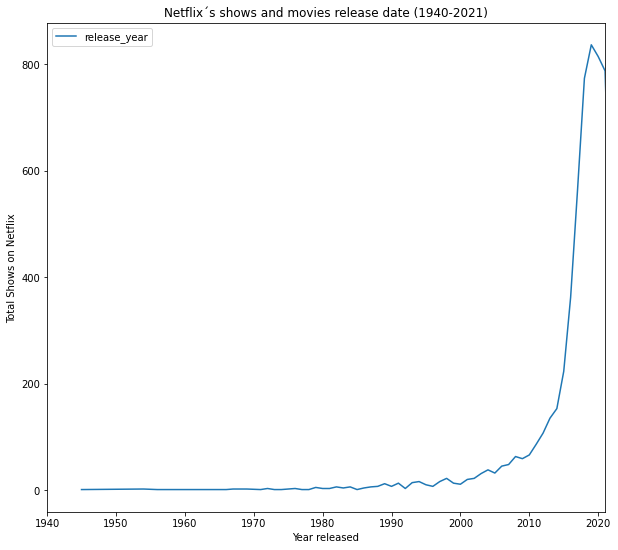

In [79]:
release_year_count=titles['release_year'].value_counts()
release_year_count=pd.DataFrame(release_year_count)

plt.figure(figsize=(10, 9))
sns.lineplot(data=release_year_count)
plt.title('Netflix´s shows and movies release date (1940-2021)')
plt.xlim(1940, 2021)
plt.xlabel('Year released')
plt.ylabel('Total Shows on Netflix')
plt.show()

### The graph shows that Netflix has added a lot of content starting from 2010, and the numbers were highest during 2019. The dip in the new content during the end of 2019 and 2020 was because of the onset of COVID-19 that halted the production.

# Interesting facts:

## The Good
After the lockdown, it was observed that films of every language started gaining popularity in India,in spite of being dubbed or having subtitles.
The concept of language barrier was broken, and as proof we have the tremendous hit movies like KGF 2, Pushpa, Kantara.
Netflix played a major part in this because of the fact that people got used to watching their episodes of money heist or their favorite k-dramas with subtitles. They gave importance to the story rather than the language. 
Good acting was appreciated, even if they could not pronounce the name of the actor.
Netflix and other OTT platforms became the reason behind this change.


## Funny 
During our review and analysis into this subject, we found that the ### movie has a running time of 209 minutes which is around 3.48 hours.

The shortest running movie on Netflix is ### with just 37 minutes of running time.

## Weird 
On Netflix, 
the most common first name of directors id DAVID and MICHEAL.
The most common first name of actors is 
(These must be filled using the word cloud)
So, if you have one of these names, who knows, you may become famous as well…


# Multilateral Analysis

<a id="6.6"></a>
## <b>6.6 <span style='color:#B21010'>|</span> Genres and IMDB Score

In [80]:
genres_imdb=titles.groupby('genres')[['imdb_score']].sum().reset_index()

In [81]:
fig=px.bar(x=genres_imdb["genres"],
          y=genres_imdb["imdb_score"],
          color=genres_imdb["genres"],
          color_discrete_sequence=px.colors.sequential.Plasma,
          text=genres_imdb["imdb_score"],
          title= 'Distribution IMDB Scores by Genres',
          template= 'plotly_dark')

fig.update_layout(xaxis_title="Genres",
                 yaxis_title="IMDB Score",
                 font=dict(size=15, family="Franklin Gothic"))

fig.show()

<a id="6.7"></a>
## <b>6.7 <span style='color:#B21010'>|</span> Genres and TMDB Score

In [82]:
genres_tmdb=titles.groupby('genres')[['tmdb_score']].sum().reset_index()

In [83]:
fig=px.bar(x=genres_tmdb["genres"],
          y=genres_tmdb["tmdb_score"],
          color=genres_tmdb["genres"],
          color_discrete_sequence=px.colors.sequential.BuGn,
          text=genres_tmdb["tmdb_score"],
          title= 'Distribution TMDB Score by Genres',
          template= 'plotly_dark')

fig.update_layout(xaxis_title="Genres",
                 yaxis_title="TMDB Score",
                 font=dict(size=15, family="Franklin Gothic"))

fig.show()

## Conclusion from IMDB and TMDB:

### The graphs indicate that the genres, "comedy"  and "drama" are the ones with highest ratings. This points to the fact that the content belonging to these two genres are most popular as many people have given it high ratings. Now if we closly look at the netflix data set, we can observe that the amount of content per genres is consistent with the results of the graphs. Netflix had the maximum content only in these two genres.

### Moreover, even if we look at the least popular genres, which are "western" and "war" according to IMBD and TMDB, we observe that Netflix too has the least content in these two genres. 

<a id="6.8"></a>
## <b>6.8 <span style='color:#B21010'>|</span> Distribution of Release Year and IMDB Popularity by Type

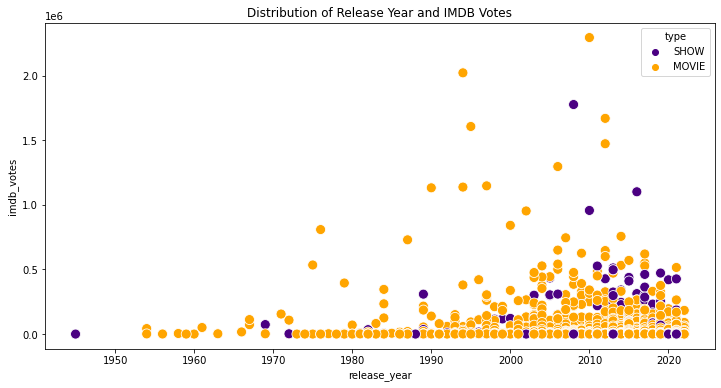

In [84]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Release Year and IMDB Votes')

sns.scatterplot(x=titles.release_year,
                y=titles.imdb_votes,
               hue=titles.type,
                palette=['indigo','orange'],
               s=100);

<a id="6.9"></a>
## <b>6.9 <span style='color:#B21010'>|</span> Distribution of Release Year and TMDB Popularity by Type

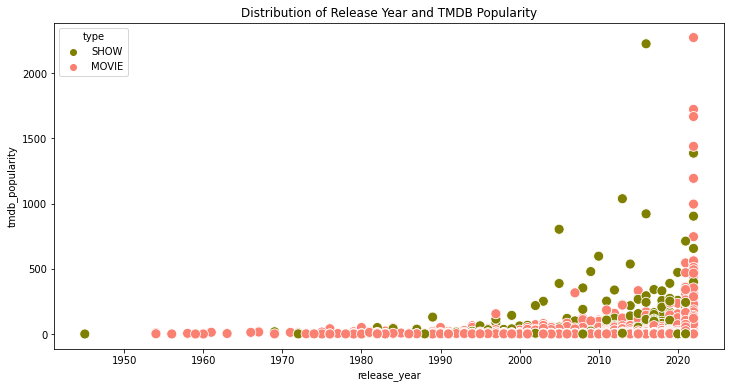

In [85]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Release Year and TMDB Popularity')

sns.scatterplot(x=titles.release_year,
                y=titles.tmdb_popularity,
               hue=titles.type,
                palette=['olive','salmon'],
               s=100);

### Conclusion: This scatter plots indicates that movies are more popular than tv shows, and this is picked up by Netflix because 64% of their content is movies. (the proof of popularity is due to the fact that movies have higher number of imdb_votes and tmdb_votes)